In [ ]:
import numpy as np
import pandas as pd
import glob
from skimage.io import imread
from skimage import io
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
!unzip -q 'Group_6.zip'

replace Group_6/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
def convert_to_csv(path_to_dataset):
    image_paths = glob.glob(path_to_dataset + '/*/*/*.JPEG') #retrieve a list of file paths that match the pattern


    train_imgs = []
    test_imgs = []

    for image_path in image_paths:
        image = imread(image_path) #loads the image as a NumPy array.
        if image.shape[-1] != 3:
            image = gray2rgb(image) #If the image is not already a color image then convert it to an RGB image
        if image_path.split('/')[-3] == 'train':
            train_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]]) #updated with the flattened image pixel values (converted to a list) followed by the label

        else:
            test_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])

    img_0 = imread(image_paths[0]) #Reads the first image from the image_paths list to get an example image for its shape
    column_names = [f"p_{x}" for x in range(np.prod(img_0.shape))] + ['label'] #Generates a list of column names for the DataFrame and the last column is named "label" for the image label.

    train_df = pd.DataFrame(train_imgs, columns=column_names)
    test_df = pd.DataFrame(test_imgs, columns=column_names)

    train_df.to_csv(path_to_dataset+'/train.csv', index=False)
    test_df.to_csv(path_to_dataset+'/test.csv', index=False)
convert_to_csv('Group_6')

In [ ]:
df_train = pd.read_csv('Group_6/train.csv')

In [ ]:
#data size
df_train.shape

(2150, 12289)

In [ ]:
df_train

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,180,162,148,179,161,147,178,162,149,177,...,112,34,22,88,10,0,142,65,55,rocker
1,47,52,48,60,65,61,42,48,48,45,...,102,101,97,96,95,91,100,99,95,rocker
2,240,255,255,133,149,146,89,101,99,44,...,119,169,140,139,162,154,149,159,161,rocker
3,215,215,215,215,215,215,215,215,215,217,...,192,198,210,174,186,202,148,163,182,rocker
4,219,209,208,220,210,209,221,211,210,222,...,143,125,121,143,124,118,141,122,116,rocker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,136,135,130,161,160,155,185,185,177,200,...,22,11,9,12,2,1,17,7,8,sombrero
2146,202,220,206,202,220,206,202,220,206,202,...,182,173,156,167,157,145,149,139,127,sombrero
2147,241,241,241,240,240,240,239,239,239,238,...,8,8,8,6,6,6,11,11,11,sombrero
2148,247,247,247,247,247,247,248,248,248,248,...,45,19,80,58,34,68,131,109,130,sombrero


In [ ]:
unique_labels = df_train["label"].unique()
print(unique_labels)
print(len(unique_labels))   # we have 5 unique labels

['rocker' 'remote' 'schoolbus' 'scoreboard' 'sombrero']
5


In [ ]:
#data distribution

print(df_train.label.value_counts())



rocker        500
schoolbus     500
scoreboard    500
sombrero      400
remote        250
Name: label, dtype: int64


In [ ]:
df_test = pd.read_csv('Group_6/test.csv')

In [ ]:
df_test.shape

(250, 12289)

rocker        50
remote        50
schoolbus     50
scoreboard    50
sombrero      50
Name: label, dtype: int64


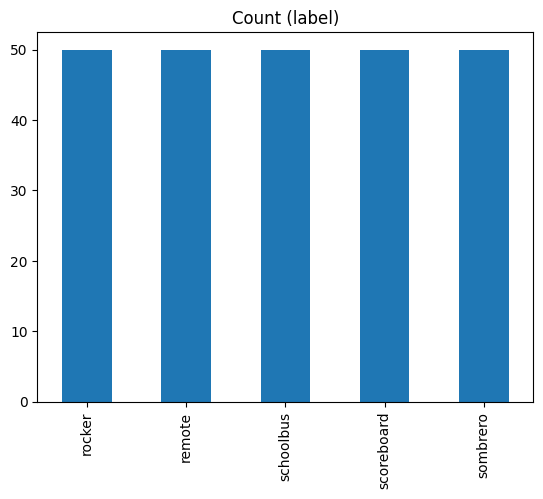

In [ ]:
print(df_test.label.value_counts())

df_test.label.value_counts().plot(kind='bar', title='Count (label)');

In [ ]:
#converting the labels from categorical values to numerical values

lab = LabelEncoder()
lab.fit(df_train["label"])
df_train["label"] = lab.transform(df_train["label"])
df_test["label"] = lab.transform(df_test["label"])

In [ ]:
df_train['label']

0       1
1       1
2       1
3       1
4       1
       ..
2145    4
2146    4
2147    4
2148    4
2149    4
Name: label, Length: 2150, dtype: int64

In [ ]:
X_train = df_train.drop(['label'], axis=1)
y_train = df_train["label"]

In [ ]:
X_test= df_test.drop(['label'], axis=1)
y_test= df_test["label"]

In [ ]:
#scaling train

X_train_norm = preprocessing.minmax_scale(X_train)
df_train = pd.DataFrame(X_train_norm, columns=df_train.columns[:-1])
df_train.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.705882,0.635294,0.580392,0.701961,0.631373,0.576471,0.698039,0.635294,0.584314,0.694118,...,0.125490,0.439216,0.133333,0.086275,0.345098,0.039216,0.000000,0.556863,0.254902,0.215686
1,0.184314,0.203922,0.188235,0.235294,0.254902,0.239216,0.164706,0.188235,0.188235,0.176471,...,0.392157,0.400000,0.396078,0.380392,0.376471,0.372549,0.356863,0.392157,0.388235,0.372549
2,0.941176,1.000000,1.000000,0.521569,0.584314,0.572549,0.349020,0.396078,0.388235,0.172549,...,0.556863,0.466667,0.662745,0.549020,0.545098,0.635294,0.603922,0.584314,0.623529,0.631373
3,0.843137,0.843137,0.843137,0.843137,0.843137,0.843137,0.843137,0.843137,0.843137,0.850980,...,0.317647,0.752941,0.776471,0.823529,0.682353,0.729412,0.792157,0.580392,0.639216,0.713725
4,0.858824,0.819608,0.815686,0.862745,0.823529,0.819608,0.866667,0.827451,0.823529,0.870588,...,0.517647,0.560784,0.490196,0.474510,0.560784,0.486275,0.462745,0.552941,0.478431,0.454902


In [ ]:
#scaling test

X_test_norm = preprocessing.minmax_scale(X_test)
df_test = pd.DataFrame(X_test_norm, columns=df_test.columns[:-1])
df_test.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.752941,0.741176,0.705882,0.674510,0.658824,0.623529,0.678431,0.650980,0.627451,0.686275,...,0.505882,0.431373,0.486275,0.529412,0.639216,0.690196,0.752941,0.572549,0.635294,0.694118
1,0.792157,0.796078,0.733333,0.847059,0.858824,0.792157,0.635294,0.650980,0.584314,0.439216,...,0.929412,0.929412,0.925490,0.945098,0.945098,0.949020,0.964706,0.866667,0.870588,0.878431
2,0.945098,0.941176,0.996078,0.949020,0.949020,0.996078,0.956863,0.945098,0.988235,0.956863,...,0.709804,0.717647,0.705882,0.678431,0.701961,0.701961,0.670588,0.705882,0.705882,0.674510
3,0.450980,0.521569,0.317647,0.435294,0.498039,0.313725,0.568627,0.615686,0.458824,0.686275,...,0.247059,0.274510,0.337255,0.286275,0.184314,0.239216,0.180392,0.149020,0.203922,0.145098
4,0.321569,0.215686,0.149020,0.341176,0.239216,0.180392,0.466667,0.376471,0.321569,0.666667,...,0.305882,0.282353,0.301961,0.313725,0.313725,0.278431,0.243137,0.305882,0.243137,0.184314


In [ ]:
model = linear_model.LogisticRegression(C=1, fit_intercept=True,solver='lbfgs', max_iter=1000)
model = model.fit(X_train_norm, y_train)

y_predict = model.predict(X_test_norm)

acc_training = np.mean(y_train == model.predict(X_train_norm))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 100.0
Testing accuracy (%) = 46.400000000000006


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


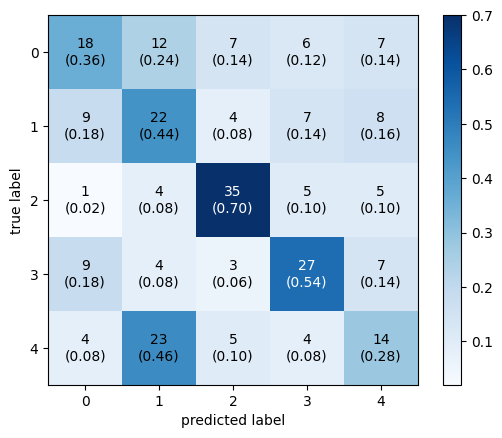

In [ ]:
#confusion matrix

cnf_matrix=confusion_matrix(y_test,y_predict)
plot_confusion_matrix(conf_mat=cnf_matrix,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
def calc(cnf_matrix):

  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  #summing up the column values of the confusion matrix and subtracting the corresponding diagonal value (True Positives) for each class
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)  # summing up the row values of the confusion matrix and subtracting the corresponding diagonal value (True Positives) for each class.
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)

  # Specificity or true negative rate
  TNR = TN/(TN+FP)

  # Precision or positive predictive value
  PPV = TP/(TP+FP)

  # Negative predictive value
  NPV = TN/(TN+FN)

  # F1 Score
  F1 = 2*((PPV)*(TPR)/(PPV + TPR))

  return TPR, TNR, PPV, NPV, F1

TPR, TNR, PPV, NPV, F1= calc(cnf_matrix)
print(TPR, TNR, PPV, NPV, F1)

[0.36 0.44 0.7  0.54 0.28] [0.885 0.785 0.905 0.89  0.865] [0.43902439 0.33846154 0.64814815 0.55102041 0.34146341] [0.84688995 0.84864865 0.92346939 0.88557214 0.8277512 ] [0.3956044  0.3826087  0.67307692 0.54545455 0.30769231]


In [ ]:
first = []
second = []
third = []
fourth = []
fifth = []
t=[]

t_ML2=[]
t_ML2_v2=[]


def formTable(a):

  for i in range(len(a)):
    if i == 0:
      first.append(round(a[i],2))
    if i == 1:
      second.append(round(a[i],2))
    if i == 2:
      third.append(round(a[i],2))
    if i == 3:
      fourth.append(round(a[i],2))
    if i == 4:
      fifth.append(round(a[i],2))

formTable(TPR)
formTable(TNR)
formTable(PPV)
formTable(NPV)
formTable(F1)

t.append(first)
t.append(second)
t.append(third)
t.append(fourth)
t.append(fifth)
print(t)

[[0.36, 0.88, 0.44, 0.85, 0.4], [0.44, 0.78, 0.34, 0.85, 0.38], [0.7, 0.9, 0.65, 0.92, 0.67], [0.54, 0.89, 0.55, 0.89, 0.55], [0.28, 0.86, 0.34, 0.83, 0.31]]


In [ ]:

slst=[]
slst_ML2=[]
slst_ML2_t6 =[]
def formt(t):
  s0=0
  s1=0
  s2=0
  s3=0
  s4=0


  for i in range(len(t)+1):
    for j in range(len(t)):
      if i!=0:
        break
      else:
        s0+= t[j][i]
      avg_s0 = s0/len(t)
    for j in range(len(t)):
      if i!=1:
        break
      else:
        s1+= t[j][i]
      avg_s1 = s1/len(t)
    for j in range(len(t)):
      if i!=2:
        break
      else:
        s2+= t[j][i]
      avg_s2 = s2/len(t)
    for j in range(len(t)):
      if i!=3:
        break
      else:
        s3+= t[j][i]
      avg_s3 = s3/len(t)
    for j in range(len(t)):
      if i!=4:
        break
      else:
        s4+= t[j][i]
      avg_s4 = s4/len(t)

  slst.append(round(avg_s0,2))
  slst.append(round(avg_s1,2))
  slst.append(round(avg_s2,2))
  slst.append(round(avg_s3,2))
  slst.append(round(avg_s4,2))
  # print(slst)
  t.append(slst)
  return t
formt(t)

[[0.36, 0.88, 0.44, 0.85, 0.4],
 [0.44, 0.78, 0.34, 0.85, 0.38],
 [0.7, 0.9, 0.65, 0.92, 0.67],
 [0.54, 0.89, 0.55, 0.89, 0.55],
 [0.28, 0.86, 0.34, 0.83, 0.31],
 [0.46, 0.86, 0.46, 0.87, 0.46]]

In [ ]:
df = pd.DataFrame(t, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.36         0.88  0.44  0.85      0.40
1           0.44         0.78  0.34  0.85      0.38
2           0.70         0.90  0.65  0.92      0.67
3           0.54         0.89  0.55  0.89      0.55
4           0.28         0.86  0.34  0.83      0.31
avg         0.46         0.86  0.46  0.87      0.46


Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
# Flatten the inputs
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], -1)

In [ ]:
# Convert the target to one-hot encoding
number_of_classes = 5
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)


print("shape of X =", X_train_norm.shape)
print("shape of y =", y_train.shape)

shape of X = (2150, 12288)
shape of y = (2150, 5)


In [ ]:
model = Sequential()
model.add( Input(shape = (12288,)) )
model.add( Dense(512, activation='sigmoid') ) #hidden layer
model.add( Dense(64, activation='sigmoid') ) #hidden layer
model.add( Dense(64, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

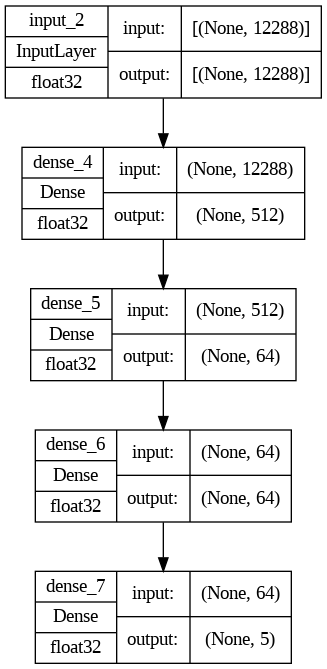

In [ ]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [ ]:
# Trainning the model
# model.fit(X_train_norm, y_train, epochs=200, verbose=1)

In [ ]:
# model.fit(X_train_norm, y_train, epochs=190, verbose=1)

In [ ]:
model.fit(X_train_norm, y_train, epochs=70, verbose=1)

Epoch 1/70
68/68 [==============================] - 5s 77ms/step - loss: 0.7501 - accuracy: 0.7228
Epoch 2/70
68/68 [==============================] - 6s 89ms/step - loss: 0.7500 - accuracy: 0.7288
Epoch 3/70
68/68 [==============================] - 5s 76ms/step - loss: 0.7485 - accuracy: 0.7209
Epoch 4/70
68/68 [==============================] - 5s 79ms/step - loss: 0.7352 - accuracy: 0.7335
Epoch 5/70
68/68 [==============================] - 6s 84ms/step - loss: 0.7495 - accuracy: 0.7214
Epoch 6/70
68/68 [==============================] - 5s 75ms/step - loss: 0.7653 - accuracy: 0.7144
Epoch 7/70
68/68 [==============================] - 7s 102ms/step - loss: 0.7806 - accuracy: 0.6991
Epoch 8/70
68/68 [==============================] - 6s 84ms/step - loss: 0.7544 - accuracy: 0.7181
Epoch 9/70
68/68 [==============================] - 6s 86ms/step - loss: 0.7165 - accuracy: 0.7395
Epoch 10/70
68/68 [==============================] - 5s 72ms/step - loss: 0.7184 - accuracy: 0.7400
Epoch 11

In [ ]:
y_pred = model.predict(X_test_norm)


8/8 [==============================] - 0s 13ms/step


In [ ]:
y_predicted = np.argmax(y_pred, axis=1)

In [ ]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
nn_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", nn_testing)

Testing accuracy (%) = 41.6


In [ ]:
# loss_test, pred_test = model.evaluate(X_test_norm, y_test)
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print("Testing accuracy (%) =", test_acc)

8/8 [==============================] - 0s 13ms/step - loss: 1.7676 - accuracy: 0.4160
Testing accuracy (%) = 0.41600000858306885


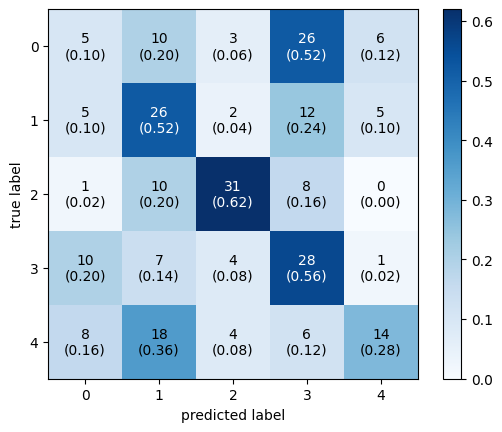

In [ ]:
cnf_matrix_ML2=confusion_matrix(y_actual,y_predicted)
plot_confusion_matrix(conf_mat=cnf_matrix_ML2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
TPR_ML2, TNR_ML2, PPV_ML2, NPV_ML2, F1_ML2= calc(cnf_matrix_ML2)

In [ ]:
first = []
second = []
third = []
fourth = []
fifth = []


formTable(TPR_ML2)
formTable(TNR_ML2)
formTable(PPV_ML2)
formTable(NPV_ML2)
formTable(F1_ML2)

t_ML2.append(first)
t_ML2.append(second)
t_ML2.append(third)
t_ML2.append(fourth)
t_ML2.append(fifth)

In [ ]:
slst=[]
formt(t_ML2)

[[0.1, 0.88, 0.17, 0.8, 0.13],
 [0.52, 0.78, 0.37, 0.87, 0.43],
 [0.62, 0.94, 0.7, 0.91, 0.66],
 [0.56, 0.74, 0.35, 0.87, 0.43],
 [0.28, 0.94, 0.54, 0.84, 0.37],
 [0.42, 0.86, 0.43, 0.86, 0.4]]

In [ ]:
df_ML2 = pd.DataFrame(t_ML2, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df_ML2)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.10         0.88  0.17  0.80      0.13
1           0.52         0.78  0.37  0.87      0.43
2           0.62         0.94  0.70  0.91      0.66
3           0.56         0.74  0.35  0.87      0.43
4           0.28         0.94  0.54  0.84      0.37
avg         0.42         0.86  0.43  0.86      0.40


Comparison

In [ ]:
pip install matplotlib

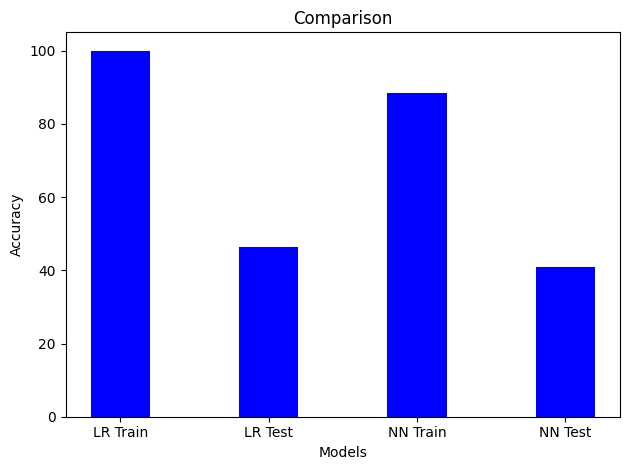

In [ ]:
import matplotlib.pyplot as plt

# Example data
categories = ['LR Train', 'LR Test', 'NN Train', 'NN Test']
values = [acc_training, acc_testing, 88.51, nn_testing]

# Bar width
bar_width = 0.4

# Create the bar chart
plt.bar(categories, values, width=bar_width, color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison')

# Show the plot
plt.tight_layout()
plt.show()
